In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def read_and_clean(fileName):
    data = pd.read_csv(fileName,sep='\t',header=None, nrows = 10000)
    data = data.drop(7, axis=1)
    data = data.replace({'i': 'j'}, regex=True)
    data = data.replace({'\+-': '-'}, regex=True)
    for i in [6,9,10]:
        data[i] = data[i].apply(lambda x: np.complex(x))
        data["real"+str(i)]=data[i].apply(lambda x: np.real(x))
        data["imag"+str(i)]=data[i].apply(lambda x: np.imag(x))
    data = data.dropna()
    return(data)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

def regress_and_pred(timePerc,fieldData):
    data = read_and_clean(fieldData)

    train = data[data[0] <= data[0].max(axis=0)*timePerc]
    test = data[data[0] <= data[0].max(axis=0)*timePerc]
    trainIn = train.drop([3,4,5,6,8,9,10,'real6','imag6'], axis=1)
    trainTa = np.ravel(train[[5]])


    testIn = test.drop([3,4,5,6,8,9,10,'real6','imag6'], axis=1)
    testTa = np.ravel(test[[5]])


    pipeline = make_pipeline(preprocessing.StandardScaler(), 
                             RandomForestRegressor(n_estimators=1000))

    hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                      'randomforestregressor__max_depth': [None, 5, 3, 1]}

    clf = GridSearchCV(pipeline, hyperparameters, cv=10)

    clf.fit(trainIn, trainTa)


    pred = clf.predict(testIn)
    R2 = r2_score(testTa, pred)
    return(pred, R2, testTa)




In [72]:
def time_est(startTimePerc, fieldData, eps, minR2):
    trial = regress_and_pred(timePerc, fieldData)
    if trial[2] > minR2:
        time_est(startTimePerc - eps, fieldData, eps, minR2)
    else:
        return(trial)

In [ ]:
final = regress_and_pred(20,'/home/cromines/Field_Proj/Field_Data2/print_fields_60.dat')

np.set_printoptions(threshold=np.nan)
print(final[1])
print(final[0])
print(final[2])

<class 'numpy.ndarray'>


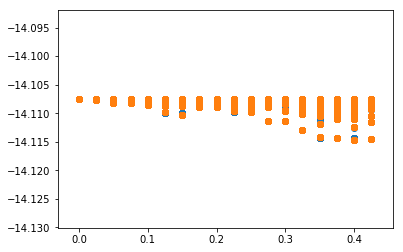

In [69]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

p = read_and_clean('/home/cromines/Field_Proj/Field_Data2/print_fields_60.dat')

print(type(final[2]))
# ax.scatter(p[0],p[1],p[5])
# ax.scatter(test[0],test[1],y2)
plt.scatter(p[0],final[0])
plt.scatter(p[0],final[2])
plt.show()
